<a href="https://colab.research.google.com/github/Pankaj-Tarone/HomeWork1/blob/master/Copy_of_comb1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import time
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
import numpy as np
from matplotlib import pyplot as plt
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, Model, model_from_json
from keras.layers import Input, Dense, UpSampling2D, Activation
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adam, SGD,rmsprop,adadelta
from sklearn.model_selection import GridSearchCV
from keras.constraints import maxnorm
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping
import keras
from keras.models import load_model
from keras.datasets import cifar10
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
import os
import pickle
import numpy as np

In [0]:
batch_size = 32
num_classes = 10
epochs = 1

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
# normalize data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


In [16]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
# divide x_test into validation and test
x_val = x_test[:7000]
x_test = x_test[7000:]

In [0]:
shape_x = 32
shape_y = 32

In [19]:
print("validation data: {0} \ntest data: {1}".format(x_val.shape, x_test.shape))

validation data: (7000, 32, 32, 3) 
test data: (3000, 32, 32, 3)


In [20]:
input_img = Input(shape=(shape_x, shape_y, 3))

# Ecoding
x = Conv2D(64, (3, 3), padding='same')(input_img)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoding
x = Conv2D(16, (3, 3), padding='same')(encoded)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(3, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
decoded = Activation('relu')(x)

In [21]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error', metrics=["accuracy"])
autoencoder.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        18464     
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 32)        128

In [22]:
autoencoder.fit(x_train, x_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, x_val),
                    shuffle=True)



Train on 50000 samples, validate on 7000 samples
Epoch 1/1
50000/50000 [==============================] - 23s 470us/step - loss: 0.0256 - acc: 0.5780 - val_loss: 0.0175 - val_acc: 0.6214


In [23]:
score = autoencoder.evaluate(x_test, x_test, verbose=1)
print(score)

3000/3000 [==============================] - 0s 90us/step
[0.01742888239522775, 0.6233339845339457]


In [0]:
c10test = autoencoder.predict(x_test)
c10val = autoencoder.predict(x_val)

In [25]:
print("Cifar10_test: {0}\nCifar10_val: {1}".format(np.average(c10test), np.average(c10val)))

Cifar10_test: 0.45016545057296753
Cifar10_val: 0.45359715819358826


In [0]:
# definition to show original image and reconstructed image
def showOrigDec(orig, dec, num=10):
    import matplotlib.pyplot as plt
    n = num
    plt.figure(figsize=(20, 4))

    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i+1)
        plt.imshow(orig[i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, n, i +1 + n)
        plt.imshow(dec[i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


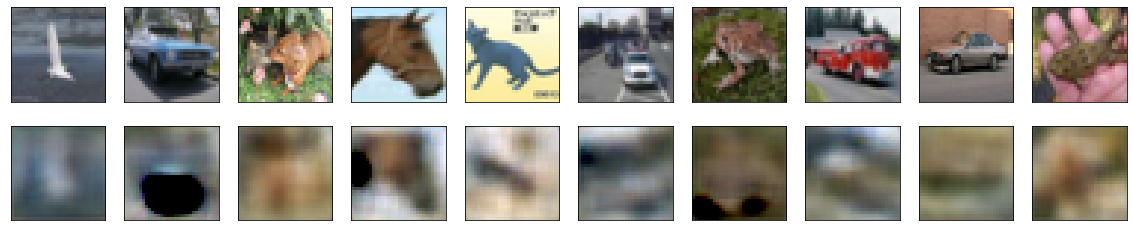

In [27]:
showOrigDec(x_test, c10test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


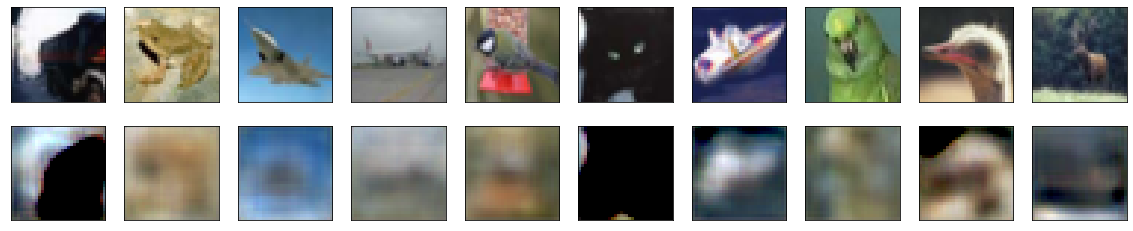

In [28]:
showOrigDec(x_test[100:], c10test[100:])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


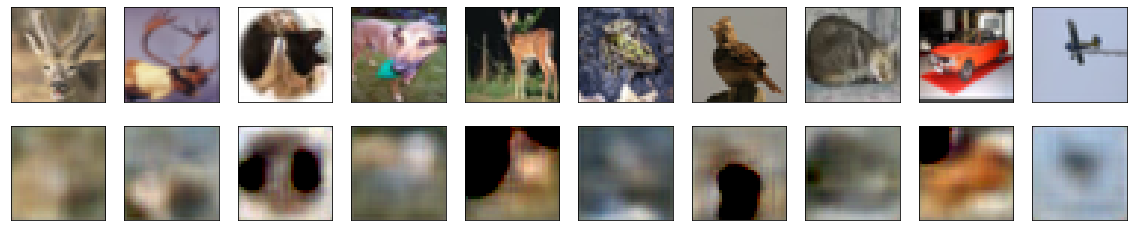

In [29]:
showOrigDec(x_test[200:], c10test[200:])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


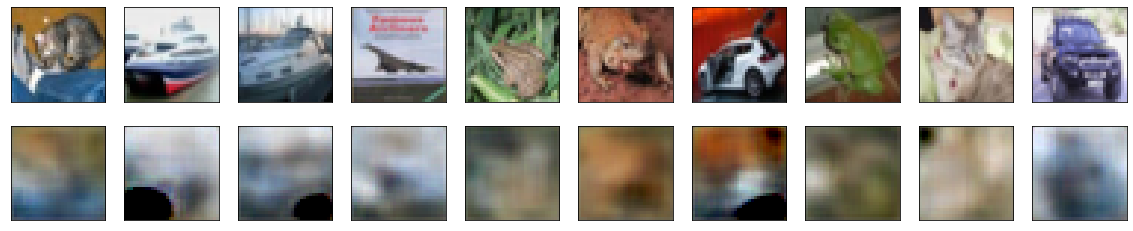

In [30]:
showOrigDec(x_val, c10val)

In [0]:
autoencoder.save('pre_autoencoder.hdf5')

In [0]:
batch_size = 32
num_classes = 10
epochs = 1

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [0]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255


In [48]:
BATCH_NORM = False

batch_size = 64
num_classes = 10
epochs = 1
data_augmentation = True

(x_train, y_train), (x_test, y_test) = cifar10.load_data() # x_train - training data(images), y_train - labels(digits)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']


# Convert and pre-processing

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [49]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
# divide x_test into validation and test
x_val = x_test[:7000]
x_test = x_test[7000:]

In [51]:
print("validation data: {0} \ntest data: {1}".format(x_val.shape, x_test.shape))

validation data: (7000, 32, 32, 3) 
test data: (3000, 32, 32, 3)


In [67]:
#second turn 

input_img = Input(shape=(shape_x, shape_y, 3))

# vikram
x1 = Conv2D(256, (3, 3), padding='same')(input_img)
x1 = BatchNormalization()(x1)
x1 = Activation('relu')(x1)
x1 = MaxPooling2D((2, 2), padding='same')(x1)
x1 = Conv2D(128, (3, 3), padding='same')(x1)
x1 = BatchNormalization()(x1)
x1 = Activation('relu')(x1)
x1 = MaxPooling2D((2, 2), padding='same')(x1)
x1 = Conv2D(64, (3, 3), padding='same')(x1)
x1 = BatchNormalization()(x1)
x1 = Activation('relu')(x1)
x1 = MaxPooling2D((2, 2), padding='same')(x1)
x1 = Conv2D(32, (3, 3), padding='same')(x1)
x1 = BatchNormalization()(x1)
x1 = Activation('relu')(x1)
x1 = MaxPooling2D((2, 2), padding='same')(x1)
x1 = Flatten()(x1)
x1 = Conv2D(16, (3, 3), padding='same')(x1)
x1 = BatchNormalization()(x1)
x1 = Activation('relu')(x1)
encoded = MaxPooling2D((2, 2), padding='same')(x1)
#class_out = Dense(10, activation='softmax')(encoded)
## load Weights
# Autoencoder
## 
#model.add(layers.Dense(3, activation='softmax'))
#class_out
##Compile and train
autoencoder1 = Model(input_img, encoded)
autoencoder1.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=["accuracy"])
autoencoder1.summary()
## Train


ValueError: ignored

In [68]:
autoencoder1.fit(x_train, x_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, x_val),
                    shuffle=True)

ValueError: ignored

In [63]:

autoencode1=autoencoder1.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, x_val),
                    shuffle=True)

ValueError: ignored

In [65]:
ans=autoencoder1.fit(x_train, x_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,x_test), shuffle=True)

ValueError: ignored

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


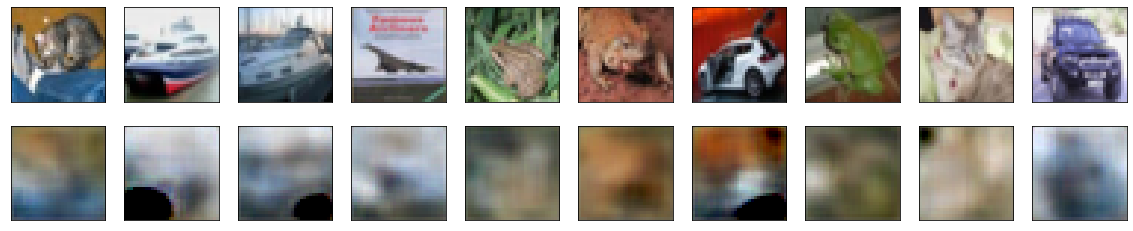

In [56]:

showOrigDec(x_val, c10val)

In [0]:
showOrigDec(x_test, c10test)